In [8]:
%reload_ext autoreload
%autoreload 2

In [2]:
from kidney_kids.scatters import *
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [3]:
#sns.pairplot(get_cleaned_data()[0])

In [4]:
get_cleaned_data()[0]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0
1,60.0,100.0,1.025,0.0,3.0,NaN,0.0,0.0,0.0,263.0,...,12.7,37.0,11400.0,4.3,1.0,1.0,1.0,2.0,0.0,0.0
2,78.0,60.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,114.0,...,8.0,24.0,NaN,NaN,0.0,1.0,0.0,2.0,0.0,1.0
3,40.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,15.0,48.0,10400.0,4.5,0.0,0.0,0.0,2.0,0.0,0.0
4,19.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,107.0,...,14.4,44.0,NaN,NaN,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,46.0,60.0,1.010,1.0,0.0,0.0,0.0,0.0,0.0,163.0,...,9.8,28.0,14600.0,3.2,1.0,1.0,0.0,2.0,0.0,0.0
316,50.0,90.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,89.0,...,6.0,17.0,6500.0,NaN,1.0,1.0,0.0,2.0,1.0,1.0
317,23.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,111.0,...,14.3,41.0,7200.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0
318,38.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,99.0,...,13.6,44.0,7300.0,6.4,0.0,0.0,0.0,2.0,0.0,0.0


In [5]:
get_cleaned_data()[2].reset_index(drop=True)

0      1
1      1
2      1
3      0
4      0
      ..
315    1
316    1
317    0
318    0
319    1
Name: classification, Length: 320, dtype: int64

In [6]:
get_preproc_data(get_cleaned_data()[0])

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,...,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.00,0.8,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.153846,0.111905,0.120735,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085
1,1.00,0.0,0.6,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.384615,0.459524,0.044619,0.011905,0.823344,0.040449,0.653061,0.622222,0.380165,0.372881
2,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.076923,0.104762,0.167979,0.033069,0.823344,0.076404,0.333333,0.333333,0.257420,0.444694
3,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.166667,0.000000,0.010582,0.823344,0.056180,0.809524,0.866667,0.338843,0.406780
4,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.088095,0.034121,0.003968,0.861199,0.038202,0.768707,0.777778,0.257420,0.444694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.25,0.2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.076923,0.221429,0.215223,0.038360,0.861199,0.033708,0.455782,0.422222,0.512397,0.186441
316,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.307692,0.045238,0.283465,0.075397,0.772871,0.042697,0.197279,0.177778,0.177686,0.444694
317,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.097619,0.062992,0.009259,0.886435,0.033708,0.761905,0.711111,0.206612,0.491525
318,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.069048,0.023622,0.001323,0.899054,0.022472,0.714286,0.777778,0.210744,0.728814


In [7]:
get_imputed_data(get_cleaned_data()[0])

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,...,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.000000,3.900000
1,1.025,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,100.0,263.0,27.0,1.3,135.0,4.3,12.7,37.0,11400.000000,4.300000
2,1.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,60.0,114.0,74.0,2.9,135.0,5.9,8.0,24.0,8429.565217,4.723697
3,1.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,140.0,10.0,1.2,135.0,5.0,15.0,48.0,10400.000000,4.500000
4,1.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,107.0,23.0,0.7,141.0,4.2,14.4,44.0,8429.565217,4.723697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1.010,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,60.0,163.0,92.0,3.3,141.0,4.0,9.8,28.0,14600.000000,3.200000
316,1.020,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,90.0,89.0,118.0,6.1,127.0,4.4,6.0,17.0,6500.000000,4.723697
317,1.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,111.0,34.0,1.1,145.0,4.0,14.3,41.0,7200.000000,5.000000
318,1.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,99.0,19.0,0.5,147.0,3.5,13.6,44.0,7300.000000,6.400000


In [8]:
df = get_preproc_data(get_cleaned_data()[0])
df

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,...,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.00,0.8,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.153846,0.111905,0.120735,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085
1,1.00,0.0,0.6,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.384615,0.459524,0.044619,0.011905,0.823344,0.040449,0.653061,0.622222,0.380165,0.372881
2,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.076923,0.104762,0.167979,0.033069,0.823344,0.076404,0.333333,0.333333,0.257420,0.444694
3,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.166667,0.000000,0.010582,0.823344,0.056180,0.809524,0.866667,0.338843,0.406780
4,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.088095,0.034121,0.003968,0.861199,0.038202,0.768707,0.777778,0.257420,0.444694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.25,0.2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.076923,0.221429,0.215223,0.038360,0.861199,0.033708,0.455782,0.422222,0.512397,0.186441
316,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.307692,0.045238,0.283465,0.075397,0.772871,0.042697,0.197279,0.177778,0.177686,0.444694
317,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.097619,0.062992,0.009259,0.886435,0.033708,0.761905,0.711111,0.206612,0.491525
318,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.069048,0.023622,0.001323,0.899054,0.022472,0.714286,0.777778,0.210744,0.728814


In [9]:
def get_preproc_data(X_train):


    ''' returns preprocessed data for log reg and tree
    ( as two features are scaled differnetly then in knn )'''
    # creating feat_lists for pipeline
    feat_binary = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
    feat_ordered = ['sg', 'al', 'su']
    feat_continuous = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc',
       'rc']



    ordered_transformer = Pipeline([
                                ('cat_imputer', SimpleImputer(strategy='most_frequent')),
                                ('mm_scaler', MinMaxScaler())
                                ])

    binary_transformer = Pipeline([
                                ('cat_imputer', SimpleImputer(strategy='most_frequent'))
                                ])

    cont_transformer = Pipeline([
                                ('num_imputer', SimpleImputer()),
                                ('mm_scaler', MinMaxScaler())
                                ])

    preproc_pipe = ColumnTransformer([
                                        ('ord_trans', ordered_transformer, feat_ordered),
                                        ('bin_trans', binary_transformer, feat_binary),
                                        ('cont_trans', cont_transformer, feat_continuous)
                                    ])


    X_preproc = preproc_pipe.fit_transform(X_train)
    SimpleImputer.get_feature_names_out = (lambda self, names=None: self.feature_names_in_)
    names = preproc_pipe.get_feature_names_out()
    new_names = list(map(lambda x: x.split('__')[-1],names))
    X_preproc_df = pd.DataFrame(X_preproc, columns=new_names)

    return X_preproc_df

In [10]:
get_preproc_data(get_cleaned_data()[0])

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,...,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.00,0.8,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.153846,0.111905,0.120735,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085
1,1.00,0.0,0.6,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.384615,0.459524,0.044619,0.011905,0.823344,0.040449,0.653061,0.622222,0.380165,0.372881
2,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.076923,0.104762,0.167979,0.033069,0.823344,0.076404,0.333333,0.333333,0.257420,0.444694
3,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.166667,0.000000,0.010582,0.823344,0.056180,0.809524,0.866667,0.338843,0.406780
4,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.088095,0.034121,0.003968,0.861199,0.038202,0.768707,0.777778,0.257420,0.444694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.25,0.2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.076923,0.221429,0.215223,0.038360,0.861199,0.033708,0.455782,0.422222,0.512397,0.186441
316,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.307692,0.045238,0.283465,0.075397,0.772871,0.042697,0.197279,0.177778,0.177686,0.444694
317,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.097619,0.062992,0.009259,0.886435,0.033708,0.761905,0.711111,0.206612,0.491525
318,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.069048,0.023622,0.001323,0.899054,0.022472,0.714286,0.777778,0.210744,0.728814


In [11]:
names = get_preproc_data(get_cleaned_data()[0])

In [12]:
new_names = list(map(lambda x: x.split('__')[-1],names))
new_names

['sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'age',
 'bp',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

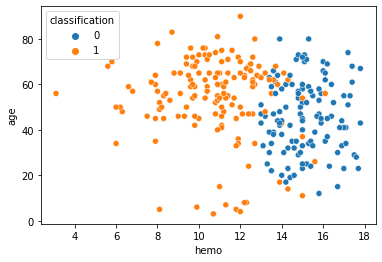

In [13]:
scatter('hemo', 'age');

In [14]:
scatter_preproc('cont_trans__hemo', 'cont_trans__pcv');

ValueError: Could not interpret value `cont_trans__hemo` for parameter `x`

In [15]:
df_1 = get_cleaned_data()[0]
df_1['target'] = get_cleaned_data()[2]
df_1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,target
0,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0,1
1,60.0,100.0,1.025,0.0,3.0,NaN,0.0,0.0,0.0,263.0,...,37.0,11400.0,4.3,1.0,1.0,1.0,2.0,0.0,0.0,1
2,78.0,60.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,114.0,...,24.0,NaN,NaN,0.0,1.0,0.0,2.0,0.0,1.0,1
3,40.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,48.0,10400.0,4.5,0.0,0.0,0.0,2.0,0.0,0.0,0
4,19.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,107.0,...,44.0,NaN,NaN,0.0,0.0,0.0,2.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,46.0,60.0,1.010,1.0,0.0,0.0,0.0,0.0,0.0,163.0,...,28.0,14600.0,3.2,1.0,1.0,0.0,2.0,0.0,0.0,1
316,50.0,90.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,89.0,...,17.0,6500.0,NaN,1.0,1.0,0.0,2.0,1.0,1.0,1
317,23.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,111.0,...,41.0,7200.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0
318,38.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,99.0,...,44.0,7300.0,6.4,0.0,0.0,0.0,2.0,0.0,0.0,0


In [16]:
df_1['target'].isnull().sum()

0

In [17]:
get_preproc_data(get_cleaned_data()[0])

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,...,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.00,0.8,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.153846,0.111905,0.120735,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085
1,1.00,0.0,0.6,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.384615,0.459524,0.044619,0.011905,0.823344,0.040449,0.653061,0.622222,0.380165,0.372881
2,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.076923,0.104762,0.167979,0.033069,0.823344,0.076404,0.333333,0.333333,0.257420,0.444694
3,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.166667,0.000000,0.010582,0.823344,0.056180,0.809524,0.866667,0.338843,0.406780
4,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.088095,0.034121,0.003968,0.861199,0.038202,0.768707,0.777778,0.257420,0.444694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.25,0.2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.076923,0.221429,0.215223,0.038360,0.861199,0.033708,0.455782,0.422222,0.512397,0.186441
316,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.307692,0.045238,0.283465,0.075397,0.772871,0.042697,0.197279,0.177778,0.177686,0.444694
317,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.097619,0.062992,0.009259,0.886435,0.033708,0.761905,0.711111,0.206612,0.491525
318,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.069048,0.023622,0.001323,0.899054,0.022472,0.714286,0.777778,0.210744,0.728814


In [18]:
df_2 = get_preproc_data(get_cleaned_data()[0])
df_2['target'] = get_cleaned_data()[2].reset_index(drop=True)
df_2

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,...,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,target
0,0.00,0.8,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.111905,0.120735,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1
1,1.00,0.0,0.6,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.459524,0.044619,0.011905,0.823344,0.040449,0.653061,0.622222,0.380165,0.372881,1
2,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.104762,0.167979,0.033069,0.823344,0.076404,0.333333,0.333333,0.257420,0.444694,1
3,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.000000,0.010582,0.823344,0.056180,0.809524,0.866667,0.338843,0.406780,0
4,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.088095,0.034121,0.003968,0.861199,0.038202,0.768707,0.777778,0.257420,0.444694,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.25,0.2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.221429,0.215223,0.038360,0.861199,0.033708,0.455782,0.422222,0.512397,0.186441,1
316,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.045238,0.283465,0.075397,0.772871,0.042697,0.197279,0.177778,0.177686,0.444694,1
317,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.097619,0.062992,0.009259,0.886435,0.033708,0.761905,0.711111,0.206612,0.491525,0
318,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.069048,0.023622,0.001323,0.899054,0.022472,0.714286,0.777778,0.210744,0.728814,0


In [19]:
df_2['target'].isnull().sum()

0

In [24]:
df_3 = get_imputed_data(get_cleaned_data()[0])
df_3['target'] = get_cleaned_data()[2]
df_3.iloc[3]

sg            1.025
al            0.000
su            0.000
rbc           0.000
pc            0.000
pcc           0.000
ba            0.000
htn           0.000
dm            0.000
cad           0.000
appet         2.000
pe            0.000
ane           0.000
age          40.000
bp           80.000
bgr         140.000
bu           10.000
sc            1.200
sod         135.000
pot           5.000
hemo         15.000
pcv          48.000
wc        10400.000
rc            4.500
target        0.000
Name: 3, dtype: float64

In [ ]:
df_3.isnull().sum()

In [ ]:
df=plot_df('cont_trans__hemo', 'cont_trans__pcv')
df

In [ ]:
df['target'].isna().sum()